# Puzzle: 3-step Newton cycle

Original description:

> x!=0; n(x) is one step of newtons method with respect to f(x); find f(x) such that n(n(n(f(x)))) = f(x)

> and n(f(x)) != f(x)

## Approach: Hermite Interpolation

Pick any three points $`x_0, x_1, x_2`$. Let $`f_0 = x_0, f_1 = x_1, f_2 = x2, f\prime_0 = x_1, f\prime_1 = x_2, f\prime_2 = x_0`$.

In [24]:
from IPython.display import display
from sympy import diff, simplify, symbols, solve, Eq, Symbol
from typing import cast

x = Symbol('x')

# Generic 5th degree polynomial
a0,a1,a2,a3,a4,a5 = (cast(Symbol, s) for s in symbols('a0 a1 a2 a3 a4 a5'))
P = a0 + a1*x + a2*x**2 + a3*x**3 + a4*x**4 + a5*x**5

dP = diff(P,x)

# Force it through our points; f_i = x_i, f\prime_i = x_{(i+1) mod 3}
points = [1, 2, 3]
eqs = [Eq(P.subs(x, pt), pt) for pt in points] + [Eq(dP.subs(x, pt), next_) for pt,next_ in zip(points, points[1:] + points[:1])]
display(eqs)

# See if sympy can interpolate without us needing to explicitly solve lagrangian coefficients
sol = simplify(solve(eqs, (a0,a1,a2,a3,a4,a5)))
display(sol)

[Eq(a0 + a1 + a2 + a3 + a4 + a5, 1),
 Eq(a0 + 2*a1 + 4*a2 + 8*a3 + 16*a4 + 32*a5, 2),
 Eq(a0 + 3*a1 + 9*a2 + 27*a3 + 81*a4 + 243*a5, 3),
 Eq(a1 + 2*a2 + 3*a3 + 4*a4 + 5*a5, 2),
 Eq(a1 + 4*a2 + 12*a3 + 32*a4 + 80*a5, 3),
 Eq(a1 + 6*a2 + 27*a3 + 108*a4 + 405*a5, 1)]

{a0: -45, a1: 139, a2: -641/4, a3: 351/4, a4: -91/4, a5: 9/4}

Verify:

In [25]:
solved = P.subs(sol)
dsolved = diff(solved, x)
for x_val in points:
    fx = solved.subs(x, x_val)
    dfz = dsolved.subs(x, x_val)
    display(f"P({x_val}) = {fx}, P'({x_val}) = {dfz}")

"P(1) = 1, P'(1) = 2"

"P(2) = 2, P'(2) = 3"

"P(3) = 3, P'(3) = 1"

In [26]:
display(solved)

9*x**5/4 - 91*x**4/4 + 351*x**3/4 - 641*x**2/4 + 139*x - 45

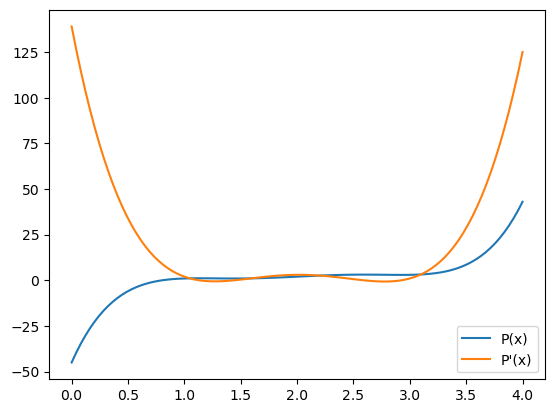

In [27]:
# Plot the solution
import matplotlib.pyplot as plt
import numpy as np
xv = np.linspace(0, 4, 100)
yv = [solved.subs(x, xv_i) for xv_i in xv]
dyv = [dsolved.subs(x, xv_i) for xv_i in xv]
ax = plt.axes()
ax.plot(xv, yv, label="P(x)")
ax.plot(xv, dyv, label="P'(x)")
plt.legend(['P(x)', "P'(x)"])